# iteration csv 파일 다루기

## iteration.csv 파일 불러오기 및 전처리 코드

- csv 특성상 콤마(,)를 기준으로 열을 구분하기 때문에 그냥 불러오면 아래와 같이 데이터가 밀릴 수 있습니다. 따라서 전처리 과정이 필요합니다.

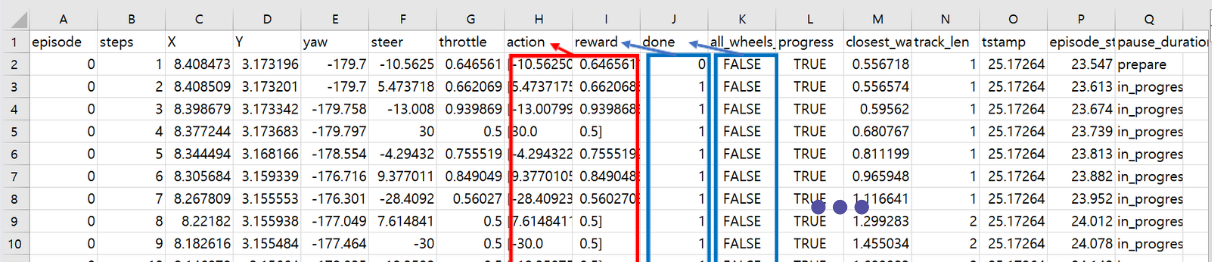

- 우선, 아래와 같이 `n-iteration.csv` 파일 들이 담겨있는 폴더 경로를 찾아서 복사합니다.

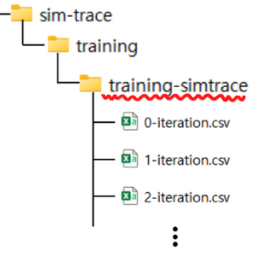


- 전처리 예시

```python
# iteration.csv 파일이 존재하는 폴더 경로 지정
simtrace_path = "iteration.csv 파일이 존재하는 폴더 경로" 

# 라이브러리 import
import os
import pandas as pd

# 파일 목록 가져오기
file_list = os.listdir(simtrace_path)

# 전처리한 데이터 프레임을 담을 리스트
df_list = []

# 전처리
for target_file in file_list : 
  target_iteration = int(target_file.split('-')[0])
  target_path = os.path.join(simtrace_path, target_file)

  with open(target_path) as f :
      csv_readlines = f.readlines()

  columns = ['iteration'] + csv_readlines[0].replace('\n','').split(',')
  data = []
  for line_text in csv_readlines[1:] :
    row = eval('[' + line_text.replace('\n','').replace('prepare', "'prepare'").replace('in_progress', "'in_progress'").replace('off_track', "'off_track'").replace('crashed',"'off_track'") + ']')
    data.append([target_iteration] + row)

  df_target = pd.DataFrame(columns = columns, data = data)
  df_list.append(df_target)

# 전처리 된 데이터프레임 병합
df_final = pd.concat(df_list).reset_index(drop=True)

df_final
```

## 주요 변수 설명

- iteration : episode의 집합.
- episode : step 의 집합
- step : episode 의 순서
- X : 차량의 x좌표
- Y : 차량의 y좌표
- yaw : 차량의 정면 각도 ( = heading)
- steer : 차량 핸들 각도
- throttle : 차량 속도 ( = speed)
- action : 행동  
  - 이산공간의 경우 행동의 index 가 표시되고 연속공간의 경우 차량의 핸들 각도와 속도가 각각 action_1, action_2 로 나누어 표시됨
- reward : 현재 step 에서 받은 보상
- all_wheels_on_track : 차량의 네 바퀴가 트랙 안에 위치하는지 여부
- progress : 현재 Epiosde 에서 완주율
- closest_waypoint : 가장 가까운 waypoint
- tstamp : 훈련이 진행된 총 시간

## 실습

### 로그 데이터 셈플

|Race_Type|Action_Space|Track|file_link|
|---|---|---|---|
|Time Trial|continuous|reinvent2019|[logs-TT-continuous](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/logs-TT-continuous-training_job_JKSgvEVATgC9vLp71zgqGA_logs.tar.gz)|
|Time Trial|discrete|reinvent2019|[logs-TT-discrete](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/logs-TT-discrete-training_job_Ovg-TyIxTH-wbiyxzYd63Q_logs.tar.gz)|
|Object Avoidance|continuous|reinvent2019|[logs-OA-continuous](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/logs-OA-continuous-training_job_sqear_VOS6azJ8DPUVeqtg_logs.tar.gz)|
|Object Avoidance|discrete|reinvent2019|[logs-OA-discrete](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/logs-OA-discrete-training_job_VucatISES96NHBUWDNmBdA_logs.tar.gz)|
|Head to Head|continuous|reinvent2019|[logs-HH-continuous](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/logs-HH-continuous-training_job_TQQkiq0qT3KrfnGmw7gQgA_logs.tar.gz)|
|Head to Head|discrete|reinvent2019|[logs-HH-discrete](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/logs-HH-discrete-training_job_MU5FJwvVQ_aBSQFNhSvF1A_logs.tar.gz)|

- 전체 다운받기 : [logs-all.zip](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/logs-all.zip)

### colab 마운트

In [1]:
from google.colab import drive

drive.mount("./gdrive")

Mounted at ./gdrive


### (실습 1) logs-TT-continuous

In [81]:
# iteration.csv 파일이 존재하는 폴더 경로 지정
simtrace_path = "/content/gdrive/MyDrive/deepracer-lecture-open-data/download_logs_sample/logs-TT-continuous/sim-trace/training/training-simtrace" 

# 라이브러리 import
import os
import pandas as pd

# 파일 목록 가져오기
file_list = os.listdir(simtrace_path)

# 전처리한 데이터 프레임을 담을 리스트
df_list = []

# 전처리
for target_file in file_list : 
  target_iteration = int(target_file.split('-')[0])
  target_path = os.path.join(simtrace_path, target_file)

  with open(target_path) as f :
      csv_readlines = f.readlines()

  columns = ['iteration'] + csv_readlines[0].replace('\n','').split(',')
  data = []
  for line_text in csv_readlines[1:] :
    row = eval('[' + line_text.replace('\n','').replace('prepare', "'prepare'").replace('in_progress', "'in_progress'").replace('off_track', "'off_track'").replace('crashed',"'off_track'") + ']')
    data.append([target_iteration] + row)

  df_target = pd.DataFrame(columns = columns, data = data)
  df_list.append(df_target)

# 전처리 된 데이터프레임 병합
df_final = pd.concat(df_list).reset_index(drop=True)

df_final

,iteration,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1.0,0.322517,2.691220,-84.005984,-30.000000,1.000000,"[-30.0, 1.0]",0.000,False,True,0.606251,1,23.118222,23.374,prepare,0.0
1,0,0,2.0,0.322497,2.691373,-84.006075,-30.000000,0.784473,"[-30.0, 0.7844727679611428]",1.000,False,True,0.605583,1,23.118222,23.440,in_progress,0.0
2,0,0,3.0,0.319572,2.678847,-85.027137,-10.536257,0.588895,"[-10.536256828073078, 0.5888954477708513]",1.000,False,True,0.657471,1,23.118222,23.499,in_progress,0.0
3,0,0,4.0,0.312488,2.659821,-87.260787,24.231568,0.500000,"[24.231567735164617, 0.5]",1.000,False,True,0.734625,1,23.118222,23.574,in_progress,0.0
4,0,0,5.0,0.316719,2.633208,-86.645489,-22.579592,0.663647,"[-22.579592254845238, 0.6636468022947859]",1.000,False,True,0.851172,1,23.118222,23.638,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,2,59,168.0,7.237886,1.131095,20.460835,-5.609134,0.901326,"[-5.609133698222017, 0.9013260732040003]",0.001,False,False,41.477307,57,23.118222,275.702,in_progress,0.0
3251,2,59,169.0,7.290502,1.152754,20.850336,-7.973791,1.000000,"[-7.973791102262979, 1.0]",0.001,False,False,41.635570,57,23.118222,275.768,in_progress,0.0
3252,2,59,170.0,7.350248,1.173194,20.355409,-8.208197,0.624271,"[-8.208196500022996, 0.6242709462324019]",0.001,False,False,41.865668,57,23.118222,275.839,in_progress,0.0
3253,2,59,171.0,7.407519,1.190892,19.630001,-12.337266,0.659029,"[-12.33726560992902, 0.659029347465123]",0.001,False,False,42.079821,58,23.118222,275.900,in_progress,0.0


### (실습 2) logs-TT-discrete

In [82]:
# iteration.csv 파일이 존재하는 폴더 경로 지정
simtrace_path = "/content/gdrive/MyDrive/deepracer-lecture-open-data/download_logs_sample/logs-TT-discrete/sim-trace/training/training-simtrace" 

# 라이브러리 import
import os
import pandas as pd

# 파일 목록 가져오기
file_list = os.listdir(simtrace_path)

# 전처리한 데이터 프레임을 담을 리스트
df_list = []

# 전처리
for target_file in file_list : 
  target_iteration = int(target_file.split('-')[0])
  target_path = os.path.join(simtrace_path, target_file)

  with open(target_path) as f :
      csv_readlines = f.readlines()

  columns = ['iteration'] + csv_readlines[0].replace('\n','').split(',')
  data = []
  for line_text in csv_readlines[1:] :
    row = eval('[' + line_text.replace('\n','').replace('prepare', "'prepare'").replace('in_progress', "'in_progress'").replace('off_track', "'off_track'").replace('crashed',"'off_track'") + ']')
    data.append([target_iteration] + row)

  df_target = pd.DataFrame(columns = columns, data = data)
  df_list.append(df_target)

# 전처리 된 데이터프레임 병합
df_final = pd.concat(df_list).reset_index(drop=True)

df_final

,iteration,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,2,40,1.0,0.322507,2.691125,-84.000174,15.0,1.0,7,0.000,False,True,0.606656,1,23.118222,263.260,prepare,0.0
1,2,40,2.0,0.322497,2.691373,-84.006075,30.0,0.5,8,1.000,False,True,0.605583,1,23.118222,263.291,in_progress,0.0
2,2,40,3.0,0.324574,2.685322,-83.697732,0.0,1.0,5,1.000,False,True,0.632553,1,23.118222,263.382,in_progress,0.0
3,2,40,4.0,0.328456,2.664824,-83.382752,15.0,1.0,7,1.000,False,True,0.722943,1,23.118222,263.456,in_progress,0.0
4,2,40,5.0,0.330915,2.641789,-83.440031,30.0,1.0,9,1.000,False,True,0.823087,1,23.118222,263.524,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,0,19,29.0,-0.347158,3.102314,-140.954107,-15.0,1.0,3,0.001,False,False,3.901550,152,23.118222,80.496,in_progress,0.0
3083,0,19,30.0,-0.380709,3.072923,-140.669880,0.0,0.5,4,0.001,False,False,4.032639,153,23.118222,80.596,in_progress,0.0
3084,0,19,31.0,-0.413444,3.049650,-141.351053,30.0,0.5,8,0.001,False,False,4.137175,153,23.118222,80.650,in_progress,0.0
3085,0,19,32.0,-0.438021,3.024665,-140.643719,-15.0,0.5,2,0.001,False,False,4.248139,153,23.118222,80.720,in_progress,0.0


### (실습 3) logs-OA-continuous

In [83]:
# iteration.csv 파일이 존재하는 폴더 경로 지정
simtrace_path = "/content/gdrive/MyDrive/deepracer-lecture-open-data/download_logs_sample/logs-OA-continuous/sim-trace/training/training-simtrace" 

# 라이브러리 import
import os
import pandas as pd

# 파일 목록 가져오기
file_list = os.listdir(simtrace_path)

# 전처리한 데이터 프레임을 담을 리스트
df_list = []

# 전처리
for target_file in file_list : 
  target_iteration = int(target_file.split('-')[0])
  target_path = os.path.join(simtrace_path, target_file)

  with open(target_path) as f :
      csv_readlines = f.readlines()

  columns = ['iteration'] + csv_readlines[0].replace('\n','').split(',')
  data = []
  for line_text in csv_readlines[1:] :
    row = eval('[' + line_text.replace('\n','').replace('prepare', "'prepare'").replace('in_progress', "'in_progress'").replace('off_track', "'off_track'").replace('crashed',"'off_track'") + ']')
    data.append([target_iteration] + row)

  df_target = pd.DataFrame(columns = columns, data = data)
  df_list.append(df_target)

# 전처리 된 데이터프레임 병합
df_final = pd.concat(df_list).reset_index(drop=True)

df_final

,iteration,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1.0,0.322513,2.691225,-84.006397,20.684077,0.875259,"[20.68407682763616, 0.8752587687546034]",0.000,False,True,0.606227,1,23.118222,25.280,prepare,0.0
1,0,0,2.0,0.322497,2.691373,-84.006075,30.000000,0.618596,"[30.0, 0.6185960299640711]",5.001,False,True,0.605583,1,23.118222,25.349,in_progress,0.0
2,0,0,3.0,0.326084,2.683312,-83.384829,0.194598,1.000000,"[0.19459804670664838, 1.0]",5.001,False,True,0.641881,1,23.118222,25.415,in_progress,0.0
3,0,0,4.0,0.337351,2.664769,-81.130261,30.000000,0.637076,"[30.0, 0.6370756020036588]",5.001,False,True,0.728602,1,23.118222,25.480,in_progress,0.0
4,0,0,5.0,0.354745,2.635282,-78.115526,16.587501,0.500000,"[16.58750056401265, 0.5]",5.001,False,True,0.865491,1,23.118222,25.544,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,2,59,27.0,-0.273467,2.937214,-129.733517,-30.000000,0.958484,"[-30.0, 0.9584840497542667]",4.002,False,False,4.424177,153,23.118222,225.968,in_progress,0.0
3486,2,59,28.0,-0.327351,2.896705,-133.210847,26.223844,0.802901,"[26.223843556662068, 0.8029013199197002]",4.002,False,False,4.588540,153,23.118222,226.029,in_progress,0.0
3487,2,59,29.0,-0.377556,2.855187,-135.088283,-30.000000,0.529313,"[-30.0, 0.5293132074962505]",4.002,False,False,4.757997,154,23.118222,226.099,in_progress,0.0
3488,2,59,30.0,-0.419785,2.813709,-135.169548,-1.896201,1.000000,"[-1.8962011571345982, 1.0]",4.002,False,False,4.928861,154,23.118222,226.164,in_progress,0.0


## 한계점

- iteration.csv 파일에서 아쉽게도 여러 params의 정보들을 볼 수 없다.
  - 확인이 안되는 params 요소 : waypoints, track_width, objects_location 등등
- 참고로 Track Waypoints 는 아래 링크를 통해 확인 가능하다.
  - <https://github.com/aws-deepracer-community/deepracer-race-data/tree/main/raw_data/tracks>
- 다음 장에서 params에 있는 모든 요소들을 모두 print 하고 로그 기록들을 전처리하는 과정들을 살펴본다.